#  Model 1

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [2]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
history=model.fit(training_set,
                         batch_size=16,
                         epochs = 20,
                         validation_data = test_set)

Epoch 1/20
326/326 [==============================] - 93s 223ms/step - loss: 0.4762 - accuracy: 0.7919 - val_loss: 0.4309 - val_accuracy: 0.8013
Epoch 2/20
326/326 [==============================] - 73s 224ms/step - loss: 0.2409 - accuracy: 0.9017 - val_loss: 0.2954 - val_accuracy: 0.8846
Epoch 3/20
326/326 [==============================] - 76s 232ms/step - loss: 0.2057 - accuracy: 0.9212 - val_loss: 0.4827 - val_accuracy: 0.8109
Epoch 4/20
326/326 [==============================] - 66s 201ms/step - loss: 0.1969 - accuracy: 0.9203 - val_loss: 0.6087 - val_accuracy: 0.7981
Epoch 5/20
326/326 [==============================] - 70s 214ms/step - loss: 0.1966 - accuracy: 0.9179 - val_loss: 0.3265 - val_accuracy: 0.8734
Epoch 6/20
326/326 [==============================] - 75s 232ms/step - loss: 0.1677 - accuracy: 0.9318 - val_loss: 0.2479 - val_accuracy: 0.9087
Epoch 7/20
326/326 [==============================] - 66s 204ms/step - loss: 0.1646 - accuracy: 0.9351 - val_loss: 0.2853 - val_ac

In [4]:
history.history

{'loss': [0.3695043921470642,
  0.23090042173862457,
  0.20693008601665497,
  0.18811410665512085,
  0.17575708031654358,
  0.16363747417926788,
  0.16531802713871002,
  0.15034060180187225,
  0.14881248772144318,
  0.14749494194984436,
  0.1420394480228424,
  0.128981813788414,
  0.12615510821342468,
  0.1349439024925232,
  0.12747417390346527,
  0.11826691031455994,
  0.12238512933254242,
  0.11218477040529251,
  0.11615117639303207,
  0.11597977578639984],
 'accuracy': [0.8399156332015991,
  0.90625,
  0.9194785356521606,
  0.9250383377075195,
  0.9277223944664001,
  0.9346242547035217,
  0.9346242547035217,
  0.942101240158081,
  0.9409509301185608,
  0.9415260553359985,
  0.9461272954940796,
  0.9509202241897583,
  0.9507285356521606,
  0.9474693536758423,
  0.9534125924110413,
  0.9559049010276794,
  0.9551380276679993,
  0.9578220844268799,
  0.9560966491699219,
  0.9553297758102417],
 'val_loss': [0.43093734979629517,
  0.2953682541847229,
  0.48270919919013977,
  0.60872471332

In [5]:
model.save('model1.h5')

In [7]:
from tensorflow import keras
model = keras.models.load_model('model1.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=16)
print("test loss, test acc:", results)

# # Generate predictions (probabilities -- the output of the last layer)
# # on new data using `predict`
# print("Generate predictions for 3 samples")
# predictions = model.predict(x_test[:3])
# print("predictions shape:", predictions.shape)

Evaluate on test data
39/39 [==============================] - 6s 149ms/step - loss: 0.3007 - accuracy: 0.9167
test loss, test acc: [0.3006577491760254, 0.9166666865348816]


# Result Visualization

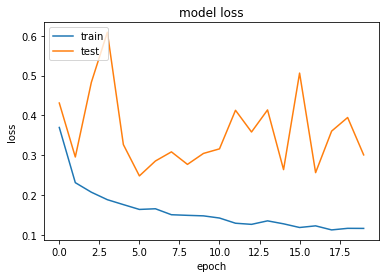

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

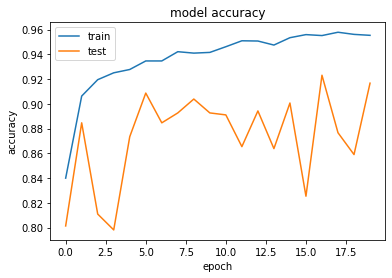

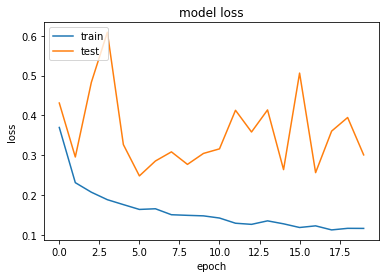

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2
<ul>
  <li>ReLU Activation</li>
  <li>SGD optimzer</li>
  <li>Dropout + Batch Normalization</li>
</ul>
Improving the previous architecture

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = (64, 64, 3)
#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

#Using adam as our optimzer
# sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0

In [ ]:
# from keras.datasets import mnist
# import tensorflow as tf
# # from keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
# from keras.layers import Dropout
# from keras.layers.normalization import BatchNormalization
# # from tensorflow.keras.optimizers import SGD
# import tensorflow as tf
# import warnings
# warnings.filterwarnings("ignore")

# output_dim=10
# batch_size = 128 
# nb_epoch = 50
# input_shape = (64, 64, 3)
# #Initialize model
# model = Sequential()

# #CNN Layer 1
# #input: 28X28 images with 1 channel -> (28X28X1) tensors.
# #this applies 64 convolution filters of size 3X3 each.
# model.add(ZeroPadding2D((1,1), input_shape=input_shape))
# model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(0.4))

# #CNN Layer 2C:\Users\gaura\Desktop\Pneumonia\model_3_1_architecture.py
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Dropout(0.4))

# #Flatten the output before feeding these to the fully connected Neurons                                    
# model.add(Flatten())

# #Fully connected Layers
# model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

# #Using adam as our optimzer
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True, name="SGD")

# #Compile the model
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [2]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
history=model.fit(training_set,
                         batch_size=16,
                         epochs = 20,
                         validation_data = test_set)

Epoch 1/20
326/326 [==============================] - 106s 243ms/step - loss: 0.6292 - accuracy: 0.7033 - val_loss: 1.5034 - val_accuracy: 0.6250
Epoch 2/20
326/326 [==============================] - 73s 224ms/step - loss: 0.3387 - accuracy: 0.8529 - val_loss: 0.7509 - val_accuracy: 0.6667
Epoch 3/20
326/326 [==============================] - 80s 244ms/step - loss: 0.2943 - accuracy: 0.8772 - val_loss: 0.4277 - val_accuracy: 0.8013
Epoch 4/20
326/326 [==============================] - 86s 264ms/step - loss: 0.2616 - accuracy: 0.8878 - val_loss: 0.7812 - val_accuracy: 0.7179
Epoch 5/20
326/326 [==============================] - 98s 301ms/step - loss: 0.2356 - accuracy: 0.9015 - val_loss: 0.3786 - val_accuracy: 0.8333
Epoch 6/20
326/326 [==============================] - 75s 228ms/step - loss: 0.2121 - accuracy: 0.9135 - val_loss: 1.3189 - val_accuracy: 0.6522
Epoch 7/20
326/326 [==============================] - 92s 283ms/step - loss: 0.2147 - accuracy: 0.9157 - val_loss: 1.3900 - val_a

In [9]:
history.history

{'loss': [0.5025299191474915,
  0.32660943269729614,
  0.28424105048179626,
  0.2567245066165924,
  0.2402765452861786,
  0.22602593898773193,
  0.2171449214220047,
  0.20748676359653473,
  0.2013283222913742,
  0.20238158106803894,
  0.20056448876857758,
  0.21095682680606842,
  0.20866915583610535,
  0.1791783571243286,
  0.19156640768051147,
  0.18120376765727997,
  0.17160409688949585,
  0.16481362283229828,
  0.17342613637447357,
  0.1711631864309311],
 'accuracy': [0.7726227045059204,
  0.8604294657707214,
  0.8799846768379211,
  0.8916794657707214,
  0.8983895778656006,
  0.9074003100395203,
  0.912193238735199,
  0.9194785356521606,
  0.9206288456916809,
  0.9166027903556824,
  0.922737717628479,
  0.9166027903556824,
  0.9212039709091187,
  0.925230085849762,
  0.9238880276679993,
  0.9288727045059204,
  0.9298312664031982,
  0.9348159432411194,
  0.933282196521759,
  0.9340490698814392],
 'val_loss': [1.503438949584961,
  0.7508995532989502,
  0.4277295768260956,
  0.78115057

In [5]:
model.save('model2.h5')

In [6]:
from tensorflow import keras
model = keras.models.load_model('model2.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=16)
print("test loss, test acc:", results)

# # Generate predictions (probabilities -- the output of the last layer)
# # on new data using `predict`
# print("Generate predictions for 3 samples")
# predictions = model.predict(x_test[:3])
# print("predictions shape:", predictions.shape)

Evaluate on test data
39/39 [==============================] - 6s 155ms/step - loss: 0.3454 - accuracy: 0.8798
test loss, test acc: [0.34543684124946594, 0.879807710647583]


# Result Visualization 

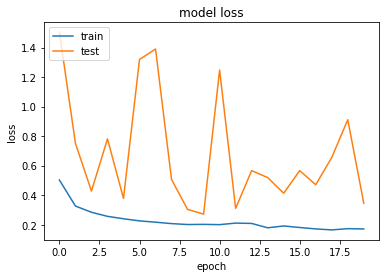

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

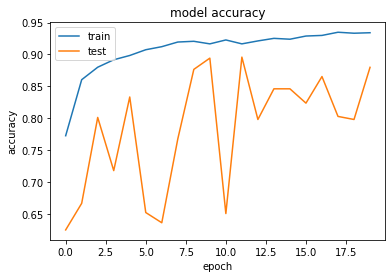

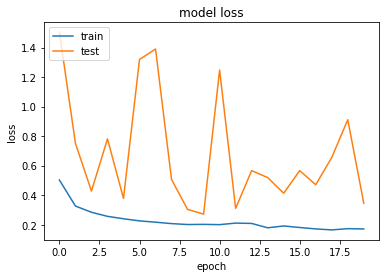

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Example 

In [ ]:

'''
output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = 
#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.4))
#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(512, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))

#compile the model
optim=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=optim)

#Get a summary of the model.
model.summary()

'''

# Model 3

<ul>
  <li>ReLU Activation</li>
  <li>RMSprop optimzer</li>
  <li>Dropout</li>
  <li>Model Architecture: 784-512-364-128-10</li>
</ul> 

**3 Hidden Layers**

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
import tensorflow

# Initialising the CNN
model_3_hidden= Sequential()

# Step 1 - Convolution
model_3_hidden.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a second convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a third convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Step 3 - Flattening
model_3_hidden.add(Flatten())

# Step 4 - Full connection
model_3_hidden.add(Dense(units = 128, activation = 'relu'))
model_3_hidden.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
optim=tensorflow.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_3_hidden.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model_3_hidden.summary()
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')


C:\Users\gaura\Desktop\Pneumonia-Detection-using-Deep-Learning\pneumonia\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9

In [2]:
history=model_3_hidden.fit(training_set,
                         batch_size=16,
                         epochs = 20,
                         validation_data = test_set)




Epoch 1/20
163/163 [==============================] - 93s 447ms/step - loss: 0.5572 - accuracy: 0.7545 - val_loss: 0.4431 - val_accuracy: 0.8333
Epoch 2/20
163/163 [==============================] - 68s 419ms/step - loss: 0.3370 - accuracy: 0.8532 - val_loss: 0.3562 - val_accuracy: 0.8413
Epoch 3/20
163/163 [==============================] - 72s 442ms/step - loss: 0.2770 - accuracy: 0.8875 - val_loss: 0.3132 - val_accuracy: 0.8654
Epoch 4/20
163/163 [==============================] - 82s 502ms/step - loss: 0.2451 - accuracy: 0.8977 - val_loss: 0.3108 - val_accuracy: 0.8798
Epoch 5/20
163/163 [==============================] - 89s 545ms/step - loss: 0.2404 - accuracy: 0.9033 - val_loss: 0.2738 - val_accuracy: 0.8942
Epoch 6/20
163/163 [==============================] - 72s 443ms/step - loss: 0.2056 - accuracy: 0.9227 - val_loss: 0.2692 - val_accuracy: 0.9038
Epoch 7/20
163/163 [==============================] - 71s 436ms/step - loss: 0.2003 - accuracy: 0.9205 - val_loss: 0.3172 - val_ac

In [3]:
history.history

{'loss': [0.4782540798187256,
  0.31483280658721924,
  0.2649865448474884,
  0.247404083609581,
  0.21762757003307343,
  0.1961437165737152,
  0.19629262387752533,
  0.18938085436820984,
  0.18454773724079132,
  0.17005831003189087,
  0.16302628815174103,
  0.16706354916095734,
  0.15214009582996368,
  0.15368099510669708,
  0.15320423245429993,
  0.15477722883224487,
  0.16286210715770721,
  0.15266750752925873,
  0.14941488206386566,
  0.15166528522968292],
 'accuracy': [0.7881518602371216,
  0.862730085849762,
  0.8909125924110413,
  0.8972392678260803,
  0.9133435487747192,
  0.9250383377075195,
  0.9221625924110413,
  0.9263803958892822,
  0.9259969592094421,
  0.9302147030830383,
  0.9388419985771179,
  0.9363496899604797,
  0.9442101120948792,
  0.9405674934387207,
  0.942101240158081,
  0.9376916885375977,
  0.9363496899604797,
  0.9422929286956787,
  0.9451687335968018,
  0.9428681135177612],
 'val_loss': [0.4431163966655731,
  0.3562142550945282,
  0.31324896216392517,
  0.31

In [5]:
model_3_hidden.save('model3.h5')

In [9]:
from tensorflow import keras
model = keras.models.load_model('model3.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=16)
print("test loss, test acc:", results)

# # Generate predictions (probabilities -- the output of the last layer)
# # on new data using `predict`
# print("Generate predictions for 3 samples")
# predictions = model.predict(x_test[:3])
# print("predictions shape:", predictions.shape)

Evaluate on test data
10/10 [==============================] - 6s 589ms/step - loss: 0.2401 - accuracy: 0.9167
test loss, test acc: [0.24013733863830566, 0.9166666865348816]


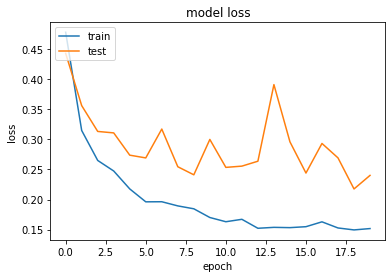

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plotting training set and validation test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

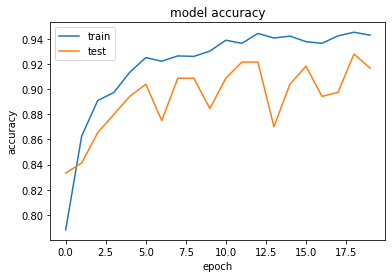

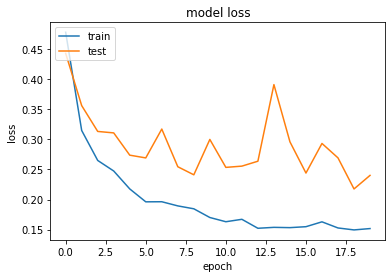

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 0, 'Hidden Layer 3 ')

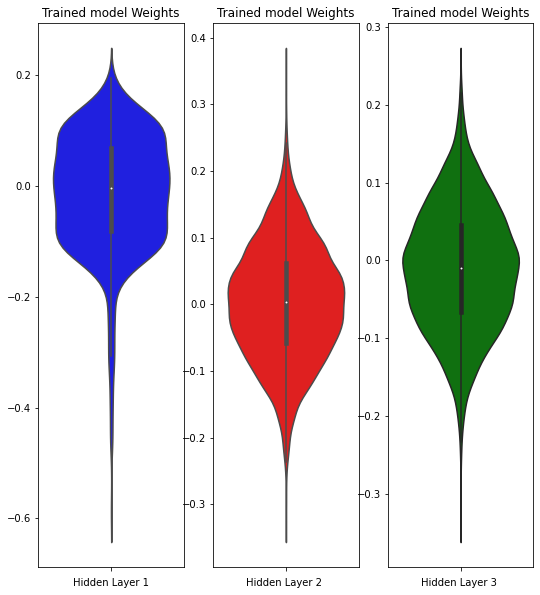

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#Violin Plots for all the weights matrices.
w_after = model_3_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


<h1>Conclusion</h1>
<html>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
<body>
    <br>
    <b>Here are the results of our three models</b> 
<table border=1>
  <tr>
    <th>Model</th>
    <th>Architecture</th>
    <th>Training Accuracy</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Model 1</td>
    <td>2:1 Arcitecture without using Batch Normalization and Dropout</td>
    <td>95.48%</td>
    <td>91.67%</td>
  </tr>
  <tr>
    <td>Model 2</td>
    <td>4:2 Achitecture using Batch Normalization and Dropout</td>
    <td>93.58%</td>
    <td>87.98%</td>
  </tr>
  <tr>
    <td>Model 3</td>
    <td>3:1 Convolutional layer</td>
    <td>94.74%</td>
    <td>91.67%</td>
  </tr>
</table>
</body>
</html>